In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/creditcard.csv')
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())
print("\nMissing values in each column:")
print(data.isnull().sum())



First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

# New Section


Distribution of classes:


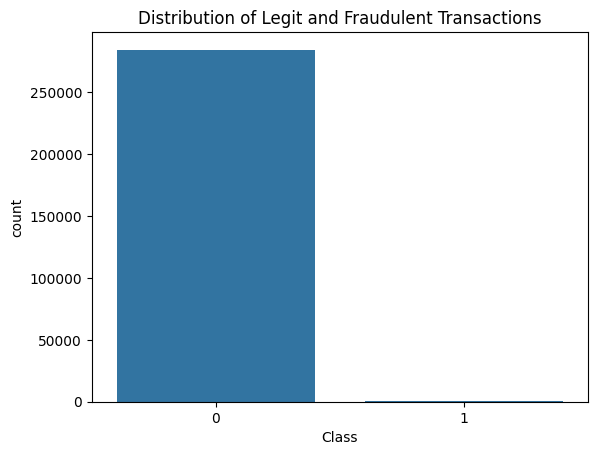


Statistical summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00 

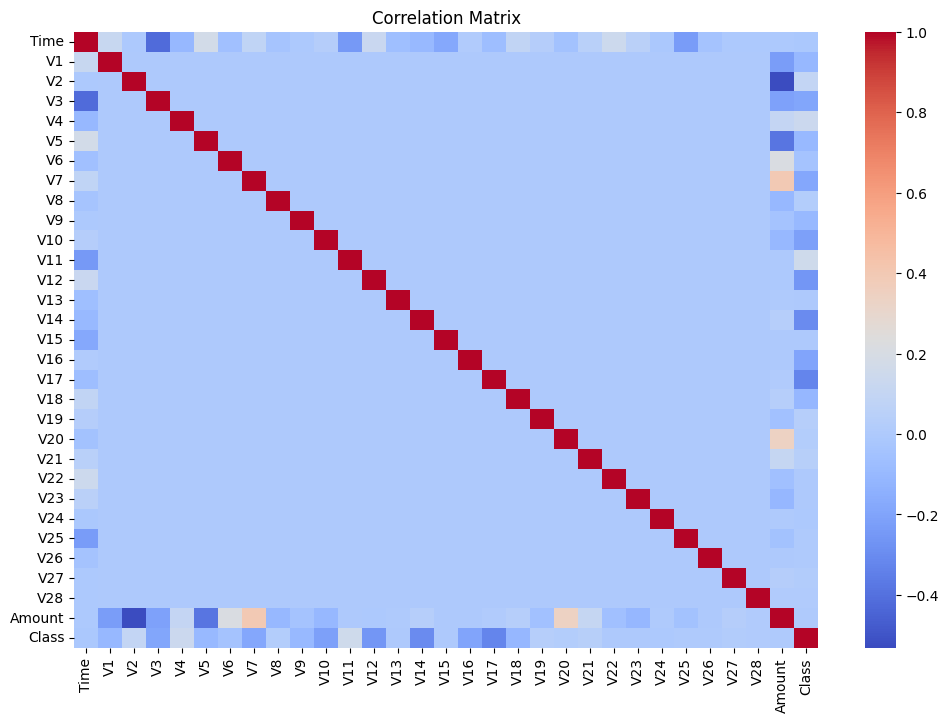

In [ ]:
# Exploratory Data Analysis (EDA)
print("\nDistribution of classes:")
sns.countplot(x='Class', data=data)
plt.title('Distribution of Legit and Fraudulent Transactions')
plt.show()

print("\nStatistical summary:")
print(data.describe())

print("\nCorrelation matrix:")
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Splitting the data into features and target variable
x = data.drop(columns='Class')
y = data['Class']


In [ ]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
print("\nDataset balanced using SMOTE.")



Dataset balanced using SMOTE.


In [ ]:

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
# Model training with Logistic Regression
model = LogisticRegression()


In [ ]:

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Best model from GridSearch
best_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'C': 10, 'max_iter': 100}


In [ ]:
# Model evaluation
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

print('\nTraining Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))
print('\nClassification Report:\n', classification_report(y_test, y_pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
print('ROC AUC Score:', roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1]))


Training Accuracy: 0.9800881065015915
Test Accuracy: 0.9805409492991928

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

Confusion Matrix:
 [[56236   514]
 [ 1699 55277]]
ROC AUC Score: 0.9974687584663517


Random Forest Test Accuracy: 0.999903276295658
XGBoost Test Accuracy: 0.9998681040395336
